In [2]:
# Sanity-check that we are indeed running this notebook from Ubuntu
import platform
platform.system()

'Linux'

In [2]:
import tensorflow as tf
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))

Num GPUs Available:  1


In [6]:
tf.test.gpu_device_name()

'/device:GPU:0'

In [7]:
import tensorflow as tf
tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [8]:
tf.config.list_physical_devices('CPU')

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]

In [12]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL']='2'

In [4]:
import tensorflow as tf
tf.config.experimental.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [10]:
gpus = tf.config.experimental.list_physical_devices('GPU')
gpus

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [12]:
# gpus = tf.config.experimental.list_physical_devices('GPU')
# if gpus:
#   try:
#     # Currently, memory growth needs to be the same across GPUs
#     for gpu in gpus:
#       tf.config.experimental.set_memory_growth(gpu, True)
#     logical_gpus = tf.config.experimental.list_logical_devices('GPU')
#     print(len(gpus), "Physical GPUs,", len(logical_gpus), "Logical GPUs")
#   except RuntimeError as e:
#     # Memory growth must be set before GPUs have been initialized
#     print(e)

1 Physical GPUs, 1 Logical GPUs


In [5]:
gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
  print("Restrict TensorFlow to only allocate 4GB of memory on the first GPU")
  try:
    tf.config.experimental.set_virtual_device_configuration(
        gpus[0],
        [tf.config.experimental.VirtualDeviceConfiguration(memory_limit=4096)])
    logical_gpus = tf.config.experimental.list_logical_devices('GPU')
    print(len(gpus), "Physical GPUs,", len(logical_gpus), "Logical GPUs")
  except RuntimeError as e:
    # Virtual devices must be set before GPUs have been initialized
    print(e)

Restrict TensorFlow to only allocate 4GB of memory on the first GPU
1 Physical GPUs, 1 Logical GPUs


cpu time took: 0.0013
cpu time took: 0.0008
cpu time took: 0.0009
cpu time took: 0.0044
cpu time took: 0.0164
cpu time took: 0.0776
cpu time took: 0.2415
cpu time took: 0.5360
cpu time took: 0.9912
cpu time took: 3.8253
cpu time took: 7.4151
gpu time took: 0.0484
gpu time took: 0.0014
gpu time took: 0.0010
gpu time took: 0.0010
gpu time took: 0.0010
gpu time took: 0.0027
gpu time took: 0.0145
gpu time took: 0.0446
gpu time took: 0.1022
gpu time took: 0.1881
gpu time took: 0.7262


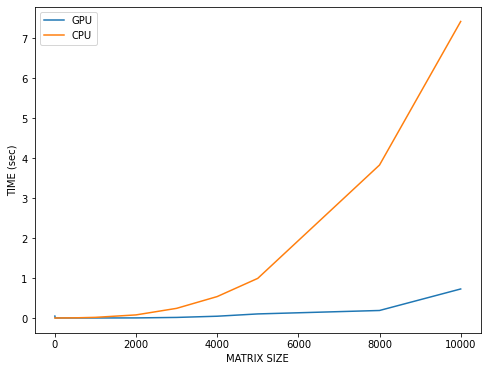

In [8]:
# import tensorflow as tf
import time
cpu_times = []
sizes = [1, 10, 100, 500, 1000, 2000, 3000, 4000, 5000, 8000, 10000]
# sizes = [4000, 5000, 8000, 10000]
with tf.device('cpu:0'):
    for size in sizes:
        # tf.reset_default_graph()
        start = time.time()
        v1 = tf.Variable(tf.random.normal((size, size)))
        v2 = tf.Variable(tf.random.normal((size, size)))
        op = tf.matmul(v1, v2)

        # with tf.Session() as sess:
        #     sess.run(tf.global_variables_initializer())
        #     sess.run(op)
        cpu_times.append(time.time() - start)
        print('cpu time took: {0:.4f}'.format(time.time() - start))

# import tensorflow as tf
import time

gpu_times = []
with tf.device('gpu:0'):
    for size in sizes:
        # tf.reset_default_graph()
        start = time.time()
        v1 = tf.Variable(tf.random.normal((size, size)))
        v2 = tf.Variable(tf.random.normal((size, size)))
        op = tf.matmul(v1, v2)

        # with tf.Session() as sess:
        #     sess.run(tf.global_variables_initializer())
        #     sess.run(op)
        gpu_times.append(time.time() - start)
        print('gpu time took: {0:.4f}'.format(time.time() - start))

import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(8, 6))
ax.plot(sizes, gpu_times, label='GPU')
ax.plot(sizes, cpu_times, label='CPU')
plt.xlabel('MATRIX SIZE')
plt.ylabel('TIME (sec)')
plt.legend()
plt.show()

In [3]:
from numba import cuda 
device = cuda.get_current_device()
device.reset()

In [ ]:
import sys
!{sys.executable} -m pip list

In [ ]:
import sys
!{sys.executable} -m pip install nodejs

In [ ]:
# import sys
# !{sys.executable} -m pip install tensorflow-serving-api tensorboard tensorboard-plugin-profile tensorflow-datasets tensorflow-hub tensorflow-probability

In [ ]:
# !{sys.executable} -m pip install atari_py

In [ ]:
# !{sys.executable} -m pip install imageio Pillow scikit-image graphviz pydot opencv-python pyglet joblib requests nbdime numexpr